In [43]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
from langgraph.checkpoint.memory import InMemorySaver

In [44]:
checkpointer = InMemorySaver()

In [45]:
class Joke(TypedDict):
    topic: str
    joke: str
    explaination: str

In [46]:
graph = StateGraph(Joke)

In [47]:
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv
load_dotenv()

model = ChatOpenAI(model='gpt-4o-mini')

def generate_node(state: Joke):
    topic = state['topic']
    prompt = f"Generate a funny joke of one line about the {topic}"

    joke = model.invoke(prompt).content

    return {'joke': joke}

def generate_explaination(state: Joke):
    topic = state['topic']
    joke = state['joke']

    prompt = f"Generate a simple explaination under 2 or 3 sentence of the joke about a topic.\nTopic:{topic}\nJoke:{joke}"

    explaination = model.invoke(prompt).content
    return {'explaination': explaination}

In [48]:
graph.add_node('generate_joke', generate_node)
graph.add_node('generate_explaination', generate_explaination)

In [49]:
graph.add_edge(START, 'generate_joke')
graph.add_edge('generate_joke', 'generate_explaination')
graph.add_edge('generate_explaination', END)

In [50]:
workflow = graph.compile(checkpointer=checkpointer)

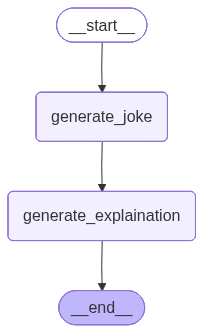

In [51]:
workflow

In [52]:
config = {
    "configurable":
    {
        'thread_id': '1'
    }
}

result = workflow.invoke({
    'topic': 'python'
}, config=config)

result

{'topic': 'python',
 'joke': 'Why did the Python programmer prefer dark mode? Because light attracts bugs!',
 'explaination': 'This joke plays on the two meanings of "light"—referring to the bright screen mode and actual light that attracts insects (or "bugs"). In programming, especially in Python, bugs (errors or issues in code) are a common concern, so the programmer humorously opts for dark mode to avoid attracting them!'}

In [53]:
workflow.get_state(config)

StateSnapshot(values={'topic': 'python', 'joke': 'Why did the Python programmer prefer dark mode? Because light attracts bugs!', 'explaination': 'This joke plays on the two meanings of "light"—referring to the bright screen mode and actual light that attracts insects (or "bugs"). In programming, especially in Python, bugs (errors or issues in code) are a common concern, so the programmer humorously opts for dark mode to avoid attracting them!'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0e79b5-5420-604c-8002-c551b1fb0b5a'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2026-01-02T05:24:38.482080+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0e79b5-41c6-677f-8001-1338b3c48847'}}, tasks=(), interrupts=())

In [54]:
list(workflow.get_state_history(config))

[StateSnapshot(values={'topic': 'python', 'joke': 'Why did the Python programmer prefer dark mode? Because light attracts bugs!', 'explaination': 'This joke plays on the two meanings of "light"—referring to the bright screen mode and actual light that attracts insects (or "bugs"). In programming, especially in Python, bugs (errors or issues in code) are a common concern, so the programmer humorously opts for dark mode to avoid attracting them!'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0e79b5-5420-604c-8002-c551b1fb0b5a'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2026-01-02T05:24:38.482080+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0e79b5-41c6-677f-8001-1338b3c48847'}}, tasks=(), interrupts=()),
 StateSnapshot(values={'topic': 'python', 'joke': 'Why did the Python programmer prefer dark mode? Because light attracts bugs!'}, next=('generate_explaination

In [55]:
config1 = {
    "configurable":
    {
        'thread_id': '2'
    }
}

result = workflow.invoke({
    'topic': 'javascript'
}, config=config1)

list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'javascript', 'joke': 'Why did the JavaScript developer go broke? Because he kept using "null" as his bank balance!', 'explaination': 'The joke plays on the JavaScript programming concept where "null" represents an absence of value. In this context, the developer is humorously portrayed as financially struggling because he literally has no money (null) in his bank account!'}, next=(), config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f0e79b6-f72e-6f1c-8002-1e1b874fdd0b'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2026-01-02T05:25:22.423567+00:00', parent_config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f0e79b6-ebe4-65fa-8001-aa16c6d474df'}}, tasks=(), interrupts=()),
 StateSnapshot(values={'topic': 'javascript', 'joke': 'Why did the JavaScript developer go broke? Because he kept using "null" as his bank balance!'}, next=('generate_explaination',), config={'config

In [56]:
list(workflow.get_state_history(config))

[StateSnapshot(values={'topic': 'python', 'joke': 'Why did the Python programmer prefer dark mode? Because light attracts bugs!', 'explaination': 'This joke plays on the two meanings of "light"—referring to the bright screen mode and actual light that attracts insects (or "bugs"). In programming, especially in Python, bugs (errors or issues in code) are a common concern, so the programmer humorously opts for dark mode to avoid attracting them!'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0e79b5-5420-604c-8002-c551b1fb0b5a'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2026-01-02T05:24:38.482080+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0e79b5-41c6-677f-8001-1338b3c48847'}}, tasks=(), interrupts=()),
 StateSnapshot(values={'topic': 'python', 'joke': 'Why did the Python programmer prefer dark mode? Because light attracts bugs!'}, next=('generate_explaination

Fault Tolerance